# Análisis de datos - Trabajo final integrador

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQATNC-EBwF-LIbDVv_L0gkP2V6oKQzah5GRg&usqp=CAU"/>

Se propone realizar el ciclo completo del desarrollo de un modelo de aprendizaje automático supervisado.

Trabajaremos con un [dataset de Kaggle con datos de por distintas estaciones metereológicas de Australia](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv).

El objetivo es predecir si lloverá o no al día siguiente (variable *RainTomorrow*), en función datos metereológicos del día actual.


## Enunciado

- Descargar el [dataset de kaggle](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv)

### 1. Análisis exploratorio inicial

- Visualizar las primeras filas.
- Realizar un resumen de 5 números.
- Identificar los tipos de datos: categórico, ordinal, etc. Responder para cada variable su tipo y si es informativa para un problema de clasificación (por ejemplo si se trata de un código, como una matrícula, o un nombre propio).
- Identificar las variables de entrada y de salida del problema.
- Variables de entrada:
  - Realizar los siguientes análisis por tipo de variable.
    - Numéricas: 
      - Obtener conclusiones acerca de la distribución de los datos.
    - Categóricas
        - Obtener conclusiones acerca de cardinalidad, representación de cada categoría, etc.
    - Compuestas/otros. ¿Cómo pueden tratarse para utilizarlas en el problema elegido?
- Variables de salida:
  - ¿Están balanceadas las clases?
  - ¿Qué técnicas consideraría para codificar la variable de salida? Justificar.

### 2. Esquema de validación de resultados

- Los pasos siguientes comprenden las etapas de preparación de datos y evaluación de resultados. 
- Para ello, se debe particionar el dataset en entrenamiento y validación.

### 3. Limpieza y preparación de datos / ingeniería de features

- Datos faltantes. Indicar cantidad de observaciones y valores faltantes para cada variable.
- ¿Qué supuestos puede realizar acerca de los datos faltantes? ¿Qué técnicas de imputación recomendaría?. Ensayar distintas técnicas y analizar los resultados. 
- En función del estudio inicial de las variables que se hizo en la sección anterior, elegir una técnica de codificación para cada variable. Cuando lo considere apropiado, ensayar distintas técnicas y comparar los resultados, teniendo en cuenta el tipo de clasificador a utilizar. Nota: para tipos de datos compuestos o estructurados, considerar la obtención de variables de tipo númerico/categórico.
- ¿Qué puede decir acerca de las relaciones entre las variables de entrada?

- Antes de entrenar un modelo de aprendizaje automático, ¿Podría identificar las variables de entrada de mayor importancia?. Considerar por lo menos dos técnicas para cada variable. Explique brevemente los métodos utilizados.

### 4. Entrenamiento de modelos

- Recurriendo a los modelos que conozca, defina una lista de modelos candidatos a entrenar (puede ser el mismo tipo de clasificador con distintos hiperparámetros). Nota: no se contemplará el desempeño del modelo elegido, sino las conclusiones que puedan establecerse a partir de la preparación previa de los datos.

- Ensaye distintas cadenas de procesamiento con las técnicas consideradas en la sección 3 (por ejemplo, distintas técnicas de imputación, selección de variables de entrada, codificación de variables categóricas, transformación, etc.).

### 5. Evaluación de resultados y conclusiones

- ¿Qué puede concluir acerca de los modelos y preparaciones de datos ensayadas? Tener en cuenta como cada preparación afecta a los distintos modelos.

### 6. Presentación de resultados

- Elabore un informe de dos o tres páginas describiendo el procedimiento realizado y las conclusiones importantes indicando la ruta del código fuente en git.


## Importacion de Librerias

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import LabelEncoder

from sklearn.impute import KNNImputer

from sklearn.feature_selection import mutual_info_classif

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier

import xgboost as xgb
from xgboost.sklearn import XGBClassifier

## Importo los datos

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/weatherAUS.csv')
df.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## Comienzo con la exploracion del dataset.

In [ ]:
df.shape

(145460, 23)

### Datatypes

In [ ]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

### Porcentaje de valores nulos




In [ ]:
df.isnull().sum() / df.shape[0] * 100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

### Sobre las features/columnas y su uso:

<u>Date:</u> 
- Variable de `Entrada`
- Tipo de dato `object`
- No tiene valores nulos.
- Se puede trabajar para ver cuanta informacion aporta como Dia, Mes u Año.

</br>

<u>Location:</u>
- Variable de `Entrada`
- Tipo de dato `object`
- No tiene valores nulos.
- Se puede trabajar para ver si tiene sentido utilizarla como str o si combiene codificarla como numeros, o si no son muchas ciudades aplicar codificacion OneHot.

</br>

<u>MinTemp:</u>     
- Variable de `Entrada`      
- Tipo de dato `float64`
- Tiene un porcentaje `bajo` de valores valores nullos
- Se puede trabajar para ver cuanta informacion aporta, y ver como afecta a su distribucion e informacion aportada el realizar imputaciones por distintos metodos.

</br>

<u>MaxTemp:</u>       
- Variable de `Entrada`    
- Tipo de dato `float64`
- Tiene un porcentaje `bajo` de valores valores nullos
- Se puede trabajar para ver cuanta informacion aporta, y ver como afecta a su distribucion e informacion aportada el realizar imputaciones por distintos metodos.

</br>

<u>Rainfall:</u>    
- Variable de `Entrada`      
- Tipo de dato `float64`
- Tiene un porcentaje `bajo` de valores valores nullos
- Se puede trabajar para ver cuanta informacion aporta, y ver como afecta a su distribucion e informacion aportada el realizar imputaciones por distintos metodos.

</br>

<u>Evaporation:</u>   
- Posible variable de `Entrada`    
- Tipo de dato `float64`
- Tiene un porcentaje `alto` de valores valores nullos, evaluar el no usar esta variable para el analisis.
- Se puede trabajar para ver cuanta informacion aporta, y ver como afecta a su distribucion e informacion aportada el realizar imputaciones por distintos metodos.

</br>

<u>Sunshine:</u>    
- Posible variable de `Entrada`      
- Tipo de dato `float64`
- Tiene un porcentaje `alto` de valores valores nullos, evaluar el no usar esta variable para el analisis.
- Se puede trabajar para ver cuanta informacion aporta, y ver como afecta a su distribucion e informacion aportada el realizar imputaciones por distintos metodos.

</br>

<u>WindGustDir:</u>  
- Variable de `Entrada`      
- Tipo de dato `object`
- Tiene un porcentaje `medio` de valores valores nullos
- Se puede trabajar para ver cuanta informacion aporta, y ver como afecta a su distribucion e informacion aportada el realizar imputaciones por distintos metodos.

</br>

<u>WindGustSpeed:</u>  
- Variable de `Entrada`   
- Tipo de dato `float64`
- Tiene un porcentaje `medio` de valores valores nullos
- Se puede trabajar para ver cuanta informacion aporta, y ver como afecta a su distribucion e informacion aportada el realizar imputaciones por distintos metodos.

</br>

<u>WindDir9am:</u>   
- Variable de `Entrada`      
- Tipo de dato `object`
- Tiene un porcentaje `medio` de valores valores nullos
- Se puede trabajar para ver cuanta informacion aporta, y ver como afecta a su distribucion e informacion aportada el realizar imputaciones por distintos metodos.

</br>

<u>WindDir3pm:</u>    
- Variable de `Entrada`     
- Tipo de dato `object`
- Tiene un porcentaje `bajo` de valores valores nullos
- Se puede trabajar para ver cuanta informacion aporta, y ver como afecta a su distribucion e informacion aportada el realizar imputaciones por distintos metodos.

</br>

<u>WindSpeed9am:</u>    
- Variable de `Entrada`  
- Tipo de dato `float64`
- Tiene un porcentaje `bajo` de valores valores nullos
- Se puede trabajar para ver cuanta informacion aporta, y ver como afecta a su distribucion e informacion aportada el realizar imputaciones por distintos metodos.

</br>

<u>WindSpeed3pm:</u>   
- Variable de `Entrada`   
- Tipo de dato `float64`
- Tiene un porcentaje `bajo` de valores valores nullos
- Se puede trabajar para ver cuanta informacion aporta, y ver como afecta a su distribucion e informacion aportada el realizar imputaciones por distintos metodos.

</br>

<u>Humidity9am:</u>   
- Variable de `Entrada`
- Tipo de dato `float64`
- Tiene un porcentaje `bajo` de valores valores nullos
- Se puede trabajar para ver cuanta informacion aporta, y ver como afecta a su distribucion e informacion aportada el realizar imputaciones por distintos metodos.

</br>

<u>Humidity3pm:</u>    
- Variable de `Entrada`  
- Tipo de dato `float64`
- Tiene un porcentaje `bajo` de valores valores nullos
- Se puede trabajar para ver cuanta informacion aporta, y ver como afecta a su distribucion e informacion aportada el realizar imputaciones por distintos metodos.

</br>

<u>Pressure9am:</u>       
- Variable de `Entrada`
- Tipo de dato `float64`
- Tiene un porcentaje `medio` de valores valores nullos
- Se puede trabajar para ver cuanta informacion aporta, y ver como afecta a su distribucion e informacion aportada el realizar imputaciones por distintos metodos.

</br>

<u>Pressure3pm:</u>     
- Variable de `Entrada`  
- Tipo de dato `float64`
- Tiene un porcentaje `medio` de valores valores nullos
- Se puede trabajar para ver cuanta informacion aporta, y ver como afecta a su distribucion e informacion aportada el realizar imputaciones por distintos metodos.

</br>

<u>Cloud9am:</u>        
- Posible variable de `Entrada`  
- Tipo de dato `float64`
- Tiene un porcentaje `alto` de valores valores nullos, evaluar el no usar esta variable para el analisis.
- Se puede trabajar para ver cuanta informacion aporta, y ver como afecta a su distribucion e informacion aportada el realizar imputaciones por distintos metodos.

</br>

<u>Cloud3pm:</u>   
- Posible variable de `Entrada`       
- Tipo de dato `float64`
- Tiene un porcentaje `alto` de valores valores nullos, evaluar el no usar esta variable para el analisis.
- Se puede trabajar para ver cuanta informacion aporta, y ver como afecta a su distribucion e informacion aportada el realizar imputaciones por distintos metodos.

</br>

<u>Temp9am:</u>     
- Variable de `Entrada`      
- Tipo de dato `float64`
- Tiene un porcentaje `bajo` de valores valores nullos
- Se puede trabajar para ver cuanta informacion aporta, y ver como afecta a su distribucion e informacion aportada el realizar imputaciones por distintos metodos.

</br>

<u>Temp3pm:</u>     
- Variable de `Entrada`      
- Tipo de dato `float64`
- Tiene un porcentaje `bajo` de valores valores nullos
- Se puede trabajar para ver cuanta informacion aporta, y ver como afecta a su distribucion e informacion aportada el realizar imputaciones por distintos metodos.

</br>

<u>RainToday:</u>     
- Variable de `Entrada`     
- Tipo de dato `object`
- Tiene un porcentaje `bajo` de valores valores nullos
- Se puede trabajar para ver cuanta informacion aporta, y ver como afecta a su distribucion e informacion aportada el realizar imputaciones por distintos metodos.

</br>

<u>RainTomorrow:</u>    
- Variable de `Salida`   
- Tipo de dato `object`
- Tiene un porcentaje `bajo` de valores valores nullos
- Se puede trabajar para ver cuanta informacion aporta, y ver como afecta a su distribucion e informacion aportada el realizar imputaciones por distintos metodos.


### Analisis de su distribucion

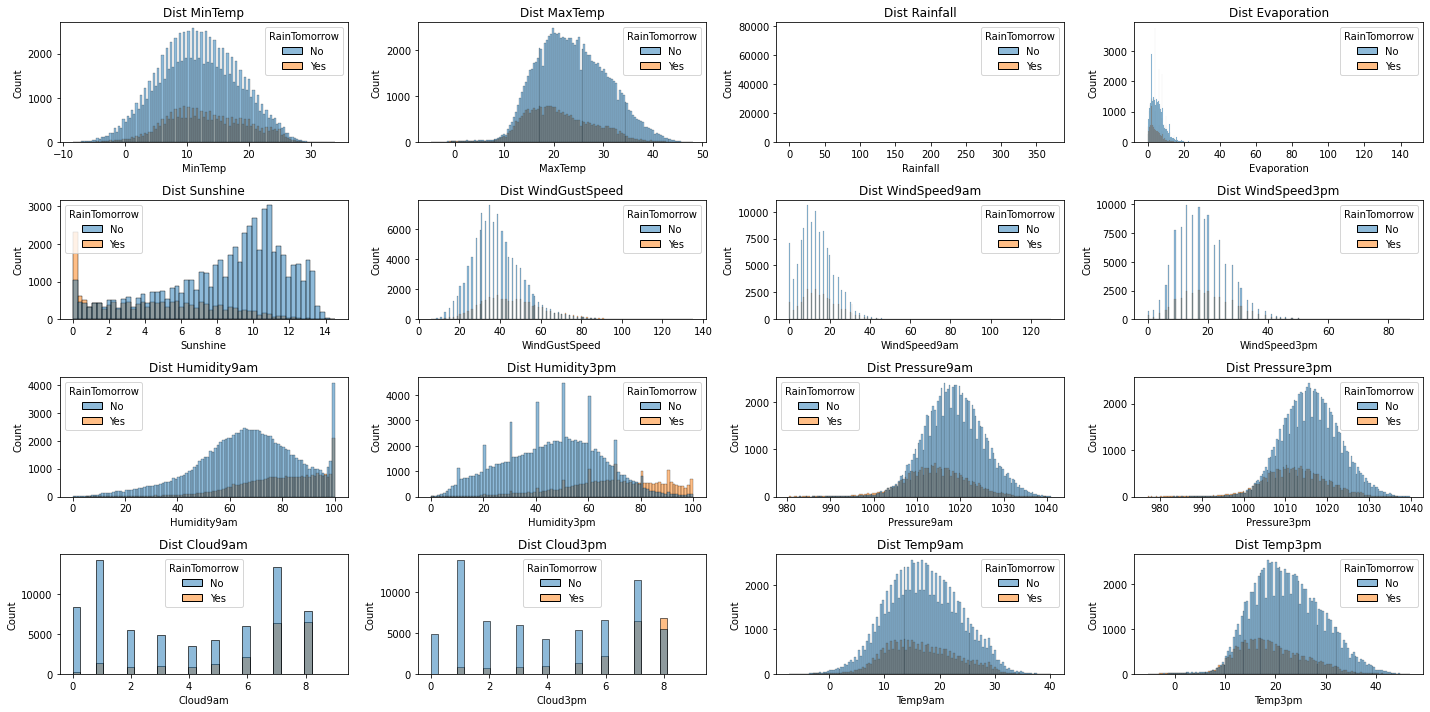

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(20,10))

for i in range(0,4):
  columnas = df.columns[df.dtypes == np.float_][0+4*i:4+4*i]
  for j in range(0,4):
    if df[columnas[j]].dtype == np.float_:
      sns.histplot(data=df, x=columnas[j], hue='RainTomorrow', ax=ax[i,j])
      ax[i,j].set_title(f'Dist {columnas[j]}')

plt.tight_layout()

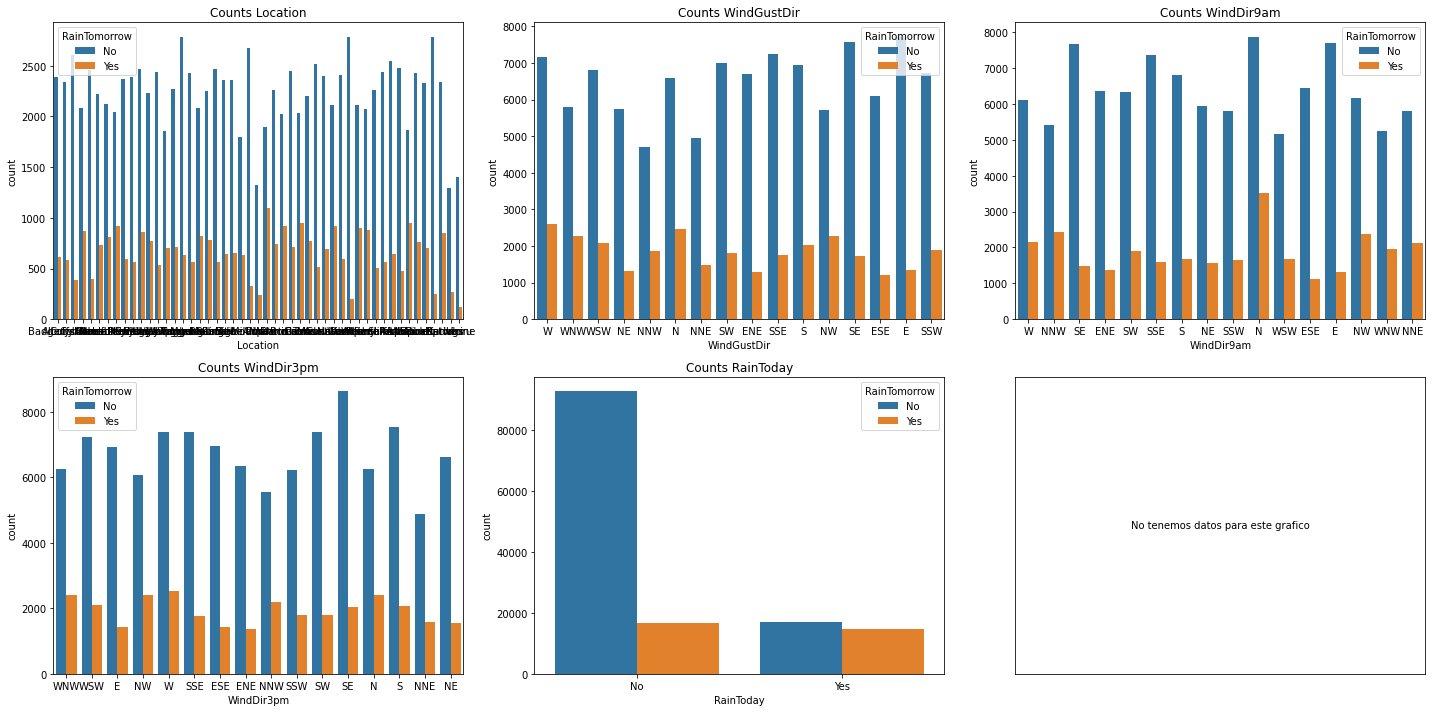

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,10))

for i in range(0,2):
  columnas = df.columns[df.dtypes != np.float_][1:-1]
  columnas_in = columnas[0+i*3:3+i*3]
  for j in range(0,3):
    try:
      sns.countplot(data=df, x=columnas_in[j], hue='RainTomorrow', ax=ax[i,j])
      ax[i,j].set_title(f'Counts {columnas_in[j]}')
    except:
      ax[i,j].text(0.5, 0.5, f'No tenemos datos para este grafico', size=10, ha='center', va='center')
      ax[i,j].get_xaxis().set_visible(False)
      ax[i,j].get_yaxis().set_visible(False)



plt.tight_layout()

### ¿ Esta balanceada la variable de salida ?

> Como se puede observar en el grafico la variable de salida `RainTomorrow` no esta balanceada.

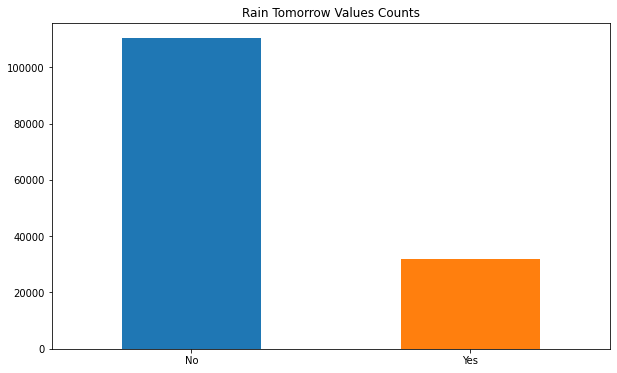

In [ ]:
plt.figure(figsize=(10,6))
df['RainTomorrow'].value_counts().plot(kind='bar', color=['C0', 'C1'], rot=0, title='Rain Tomorrow Values Counts')
plt.show()

> La variable de salia `RainTomorrow` se puede codificar con los siguientes metodos ya que la misma no presenta una cardinalidad elevada. El problema que estamos resolviendo cumple con las caracteristicas de un caso de clasificacion, donde necesitamos representar las clases con numeros para poder hacer los calculos necesarios:

- DummyEncoding
- OneHotEncoding
- LabelEncoding
- FrecuencyEncoding



In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,10))

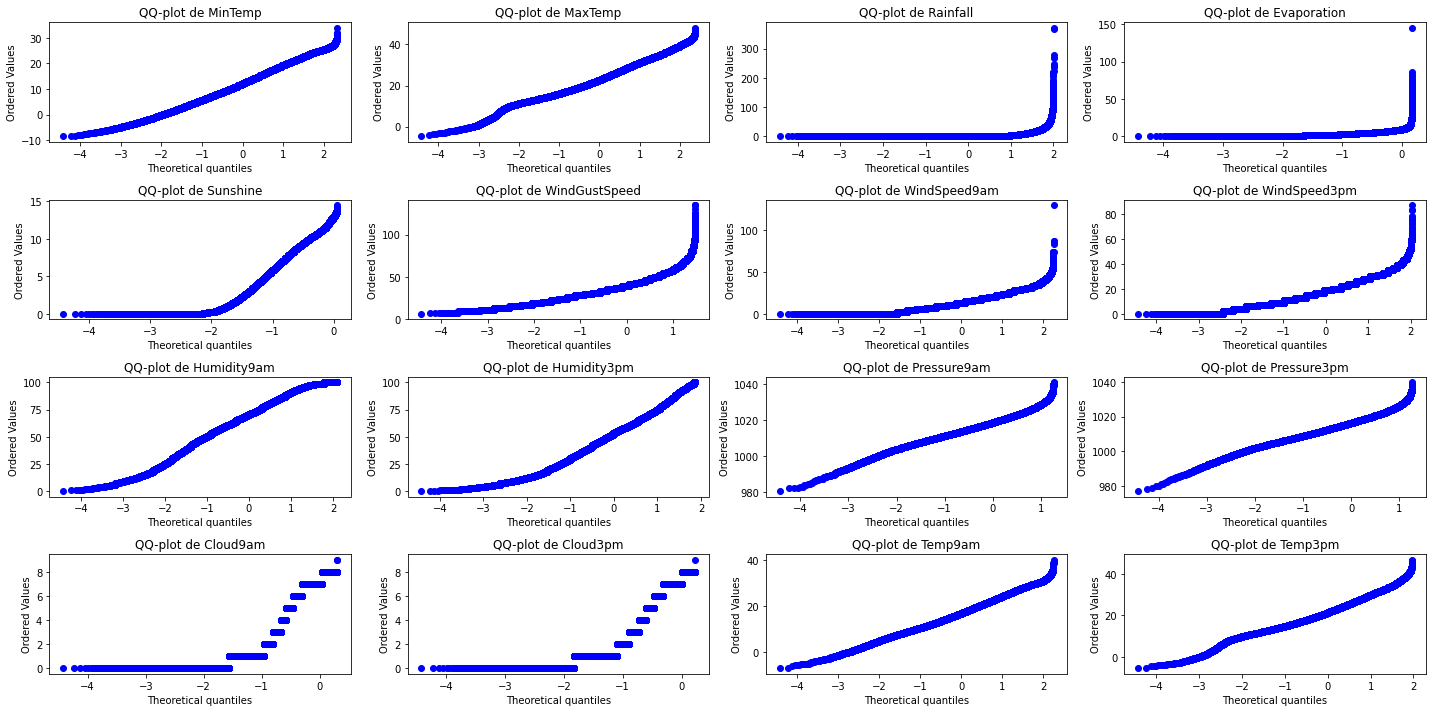

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(20,10))

for i in range(0,4):
  columnas = df.columns[df.dtypes == np.float_][0+4*i:4+4*i]
  for j in range(0,4):
    if df[columnas[j]].dtype == np.float_:
      stats.probplot(x=df[columnas[j]], dist=stats.norm(), plot=ax[i,j])
      ax[i,j].set_title(f'QQ-plot de {columnas[j]}')

plt.tight_layout()

((array([-4.42756256, -4.23227967, -4.12618601, ...,  4.12618601,
          4.23227967,  4.42756256]),
  array([1.29170834, 1.32046925, 1.32046925, ...,        nan,        nan,
                nan])),
 (nan, nan, nan))

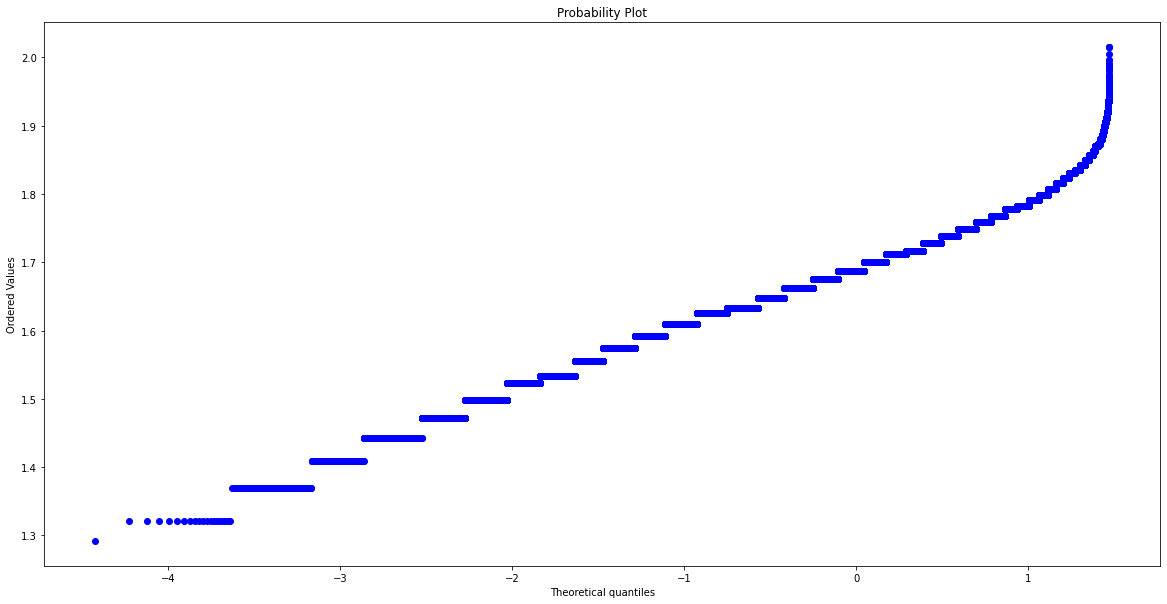

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
stats.probplot(x=np.power(df['WindGustSpeed'], 1/7), dist=stats.norm(), plot=ax)

## Preparacion de Features

### Separo en test y train

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:,:-1], 
    df.iloc[:,-1],  
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((101822, 22), (43638, 22))

In [5]:
X_train[:5]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
139678,2010-01-19,Darwin,23.4,32.8,0.0,5.2,10.9,ESE,35.0,N,W,15.0,15.0,74.0,62.0,1010.1,1007.9,7.0,4.0,29.0,31.4,No
137661,2013-07-07,AliceSprings,0.6,21.2,0.0,4.4,10.4,ESE,37.0,E,E,9.0,24.0,41.0,15.0,1026.3,1023.6,0.0,1.0,10.1,20.1,No
3459,2010-02-24,BadgerysCreek,18.3,24.9,0.0,NaN,NaN,E,31.0,SSW,ENE,9.0,15.0,67.0,60.0,1022.2,1021.2,NaN,NaN,19.5,23.9,No
58953,2011-02-20,Bendigo,13.6,22.0,0.4,4.4,NaN,SW,46.0,WSW,SSW,17.0,22.0,79.0,59.0,1010.1,1012.1,1.0,3.0,17.3,19.6,No
3521,2010-04-27,BadgerysCreek,4.2,18.4,0.0,NaN,NaN,N,19.0,NNE,WNW,7.0,6.0,96.0,54.0,1020.7,1018.1,NaN,NaN,11.2,17.6,No


### Miro si los estadisticos generales de las variables numericas varian mucho entre ambos datasets

In [8]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,100809.000000,100940.00000,99565.000000,57890.000000,53010.000000,94662.000000,100596.000000,99689.000000,99971.000000,98687.000000,91289.000000,91313.000000,62739.000000,60329.000000,100608.000000,99333.000000
mean,12.189498,23.20201,2.378599,5.453215,7.600621,40.044823,14.049187,18.685392,68.920737,51.610526,1017.655482,1015.260298,4.446851,4.505429,16.981395,21.664139
std,6.398555,7.11368,8.546598,4.205529,3.792966,13.593059,8.900352,8.803690,18.962358,20.747786,7.110292,7.037874,2.889475,2.723611,6.489094,6.928775
min,-8.500000,-4.80000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.90000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.60000,0.000000,4.600000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.20000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.525000,26.400000
max,31.900000,48.10000,367.600000,145.000000,14.500000,135.000000,130.000000,83.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,8.000000,40.200000,46.700000


In [ ]:
X_test.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,43166.000000,43259.000000,42634.000000,24780.000000,22615.000000,40535.000000,43097.000000,42709.000000,42835.000000,42266.000000,39106.000000,39119.000000,26833.000000,25773.000000,43085.000000,42518.000000
mean,12.204629,23.266472,2.319628,5.503313,7.635923,40.012828,14.029979,18.609590,68.787697,51.372380,1017.637002,1015.245596,4.448888,4.520467,17.012199,21.728367
std,6.398417,7.131439,8.315753,4.165822,3.767852,13.639851,8.950433,8.823921,19.184075,20.907114,7.097815,7.036419,2.881790,2.712750,6.487981,6.954888
min,-7.000000,-4.100000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,1.000000,0.000000,983.700000,982.600000,0.000000,0.000000,-5.600000,-4.400000
25%,7.600000,18.000000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,36.000000,1012.900000,1010.500000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.700000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.200000
75%,16.900000,28.200000,0.800000,7.400000,10.700000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,46.700000,371.000000,77.300000,14.300000,126.000000,87.000000,87.000000,100.000000,100.000000,1040.400000,1038.500000,8.000000,9.000000,39.100000,46.100000


### Miro si las clases de las variables estadisticas se mantienen tanto en el test set como en el train set

In [ ]:
for column in df.columns[df.dtypes != np.float_][1:-1]:
  unique_to_train_set = [
      x for x in X_train[column].unique() if x not in X_test[column].unique()
  ]

  unique_to_test_set = [
      x for x in X_test[column].unique() if x not in X_train[column].unique()
  ]

  print(f"Etiquetas de {column} halladas sólo en train set:",len(unique_to_train_set))
  print(f"Etiqueteas de {column} halladas sólo en test set:",len(unique_to_test_set))
  print('\n')

Etiquetas de Location halladas sólo en train set: 0
Etiqueteas de Location halladas sólo en test set: 0


Etiquetas de WindGustDir halladas sólo en train set: 1
Etiqueteas de WindGustDir halladas sólo en test set: 1


Etiquetas de WindDir9am halladas sólo en train set: 1
Etiqueteas de WindDir9am halladas sólo en test set: 1


Etiquetas de WindDir3pm halladas sólo en train set: 1
Etiqueteas de WindDir3pm halladas sólo en test set: 1


Etiquetas de RainToday halladas sólo en train set: 1
Etiqueteas de RainToday halladas sólo en test set: 1




In [ ]:
X_train.WindGustDir.value_counts(dropna=False).index.isin(X_test.WindGustDir.value_counts(dropna=False).index)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
X_test.WindGustDir.value_counts(dropna=False).index.isin(X_train.WindGustDir.value_counts(dropna=False).index)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
X_train.WindDir9am.value_counts(dropna=False).index.isin(X_test.WindDir9am.value_counts(dropna=False).index)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
X_test.WindDir9am.value_counts(dropna=False).index.isin(X_train.WindDir9am.value_counts(dropna=False).index)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
X_train.WindDir3pm.value_counts(dropna=False).index.isin(X_test.WindDir3pm.value_counts(dropna=False).index)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
X_test.WindDir3pm.value_counts(dropna=False).index.isin(X_train.WindDir3pm.value_counts(dropna=False).index)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
X_train.RainToday.value_counts(dropna=False).index.isin(X_test.RainToday.value_counts(dropna=False).index)

array([ True,  True,  True])

In [ ]:
X_test.RainToday.value_counts(dropna=False).index.isin(X_train.RainToday.value_counts(dropna=False).index)

array([ True,  True,  True])

### Miro los NA del train y test set

In [ ]:
X_train.isnull().sum() / X_train.shape[0] * 100

Date              0.000000
Location          0.000000
MinTemp           0.994873
MaxTemp           0.866218
Rainfall          2.216613
Evaporation      43.145882
Sunshine         47.938559
WindGustDir       7.077056
WindGustSpeed     7.031879
WindDir9am        7.204730
WindDir3pm        2.875606
WindSpeed9am      1.204062
WindSpeed3pm      2.094832
Humidity9am       1.817878
Humidity3pm       3.078902
Pressure9am      10.344523
Pressure3pm      10.320952
Cloud9am         38.383650
Cloud3pm         40.750525
Temp9am           1.192277
Temp3pm           2.444462
RainToday         2.216613
dtype: float64

In [ ]:
X_test.isnull().sum() / X_test.shape[0] * 100

Date              0.000000
Location          0.000000
MinTemp           1.081626
MaxTemp           0.868509
Rainfall          2.300747
Evaporation      43.214629
Sunshine         48.175902
WindGustDir       7.149732
WindGustSpeed     7.110775
WindDir9am        7.401806
WindDir3pm        2.979055
WindSpeed9am      1.239745
WindSpeed3pm      2.128879
Humidity9am       1.840139
Humidity3pm       3.144049
Pressure9am      10.385444
Pressure3pm      10.355653
Cloud9am         38.510014
Cloud3pm         40.939090
Temp9am           1.267244
Temp3pm           2.566570
RainToday         2.300747
dtype: float64

### Abrir la columna date

In [6]:
X_train['Date'] = pd.to_datetime(X_train['Date'])

X_train.loc[:,'Date_day'] = [date.day for date in X_train['Date']]
X_train.loc[:,'Date_month'] = [date.month for date in X_train['Date']]
X_train.loc[:,'Date_year'] = [date.year for date in X_train['Date']]

### Imputacion de NA en columnas con bajo porcentaje de valores nulos

In [7]:
X_train.loc[:,'MinTemp_mean'] = X_train['MinTemp'].fillna(X_train['MinTemp'].mean())
X_train.loc[:,'MinTemp_median'] = X_train['MinTemp'].fillna(X_train['MinTemp'].median())

X_train.loc[:,'MaxTemp_mean'] = X_train['MaxTemp'].fillna(X_train['MaxTemp'].mean())
X_train.loc[:,'MaxTemp_median'] = X_train['MaxTemp'].fillna(X_train['MaxTemp'].median())

X_train.loc[:,'Rainfall_mean'] = X_train['Rainfall'].fillna(X_train['Rainfall'].mean())
X_train.loc[:,'Rainfall_median'] = X_train['Rainfall'].fillna(X_train['Rainfall'].median())

X_train.loc[:,'WindSpeed9am_mean'] = X_train['WindSpeed9am'].fillna(X_train['WindSpeed9am'].mean())
X_train.loc[:,'WindSpeed9am_median'] = X_train['WindSpeed9am'].fillna(X_train['WindSpeed9am'].median())

X_train.loc[:,'Humidity9am_mean'] = X_train['Humidity9am'].fillna(X_train['Humidity9am'].mean())
X_train.loc[:,'Humidity9am_median'] = X_train['Humidity9am'].fillna(X_train['Humidity9am'].median())

X_train.loc[:,'Humidity3pm_mean'] = X_train['Humidity3pm'].fillna(X_train['Humidity3pm'].mean())
X_train.loc[:,'Humidity3pm_median'] = X_train['Humidity3pm'].fillna(X_train['Humidity3pm'].median())

In [8]:
X_train.loc[:,'Temp9am_mean'] = X_train['Temp9am'].fillna(X_train['Temp9am'].mean())
X_train.loc[:,'Temp9am_median'] = X_train['Temp9am'].fillna(X_train['Temp9am'].median())

X_train.loc[:,'Temp3pm_mean'] = X_train['Temp3pm'].fillna(X_train['Temp3pm'].mean())
X_train.loc[:,'Temp3pm_median'] = X_train['Temp3pm'].fillna(X_train['Temp3pm'].median())


### Creacion de columnas encoded

In [9]:
X_train.loc[:,'Location_fill'] = X_train['Location'].fillna(X_train['Location'].value_counts().index[0])
X_train.loc[:,'WindGustDir_fill'] = X_train['WindGustDir'].fillna(X_train['WindGustDir'].value_counts().index[0])
X_train.loc[:,'WindDir9am_fill'] = X_train['WindDir9am'].fillna(X_train['WindDir9am'].value_counts().index[0])
X_train.loc[:,'WindDir3pm_fill'] = X_train['WindDir3pm'].fillna(X_train['WindDir3pm'].value_counts().index[0])
X_train.loc[:,'RainToday_fill'] = X_train['RainToday'].fillna(X_train['RainToday'].value_counts().index[0])

In [10]:
# Location, WindGustDir, WindDir9am, WindDir3pm, RainToday

locat_enco = LabelEncoder()
wind_gust_dir_enco = LabelEncoder()
wind_dir_9_enco = LabelEncoder()
wind_dir_3_enco = LabelEncoder()
rain_today_enco = LabelEncoder()

locat_fill_enco = LabelEncoder()
wind_gust_dir_fill_enco = LabelEncoder()
wind_dir_9_fill_enco = LabelEncoder()
wind_dir_3_fill_enco = LabelEncoder()
rain_today_fill_enco = LabelEncoder()

locat_enco.fit(X_train['Location'].astype(str))
wind_gust_dir_enco.fit(X_train['WindGustDir'].astype(str))
wind_dir_9_enco.fit(X_train['WindDir9am'].astype(str))
wind_dir_3_enco.fit(X_train['WindDir3pm'].astype(str))
rain_today_enco.fit(X_train['RainToday'].astype(str))

locat_fill_enco.fit(X_train['Location_fill'].astype(str))
wind_gust_dir_fill_enco.fit(X_train['WindGustDir_fill'].astype(str))
wind_dir_9_fill_enco.fit(X_train['WindDir9am_fill'].astype(str))
wind_dir_3_fill_enco.fit(X_train['WindDir3pm_fill'].astype(str))
rain_today_fill_enco.fit(X_train['RainToday_fill'].astype(str))


X_train.loc[:,'Location_label'] = locat_enco.transform(X_train['Location'].astype(str))
X_train.loc[:,'WindGustDir_label'] = wind_gust_dir_enco.transform(X_train['WindGustDir'].astype(str))
X_train.loc[:,'WindDir9am_label'] = wind_dir_9_enco.transform(X_train['WindDir9am'].astype(str))
X_train.loc[:,'WindDir3pm_label'] = wind_dir_3_enco.transform(X_train['WindDir3pm'].astype(str))
X_train.loc[:,'RainToday_label'] = rain_today_enco.transform(X_train['RainToday'].astype(str))

X_train.loc[:,'Location_fill_label'] = locat_fill_enco.transform(X_train['Location_fill'].astype(str))
X_train.loc[:,'WindGustDir_fill_label'] = wind_gust_dir_fill_enco.transform(X_train['WindGustDir_fill'].astype(str))
X_train.loc[:,'WindDir9am_fill_label'] = wind_dir_9_fill_enco.transform(X_train['WindDir9am_fill'].astype(str))
X_train.loc[:,'WindDir3pm_fill_label'] = wind_dir_3_fill_enco.transform(X_train['WindDir3pm_fill'].astype(str))
X_train.loc[:,'RainToday_fill_label'] = rain_today_fill_enco.transform(X_train['RainToday_fill'].astype(str))

### Imputacion de NA en columnas con porcentaje medio de valores nulos

In [11]:
# Pressure9am, Pressure3pm, WindGustSpeed

imputer = KNNImputer(n_neighbors=3)
X_train_knn_imp = imputer.fit_transform(X_train[X_train.columns[[2, 3, 4, 8, 11, 12, 13, 14, 15, 16, 19, 20]]])


In [12]:
X_train.loc[:,'MinTemp_knn_imp'] = X_train_knn_imp[:, 0]
X_train.loc[:,'MaxTemp_knn_imp'] = X_train_knn_imp[:, 1]
X_train.loc[:,'Rainfall_knn_imp'] = X_train_knn_imp[:, 2]
X_train.loc[:,'WindGustSpeed_knn_imp'] = X_train_knn_imp[:, 3]
X_train.loc[:,'WindSpeed9am_knn_imp'] = X_train_knn_imp[:, 4]
X_train.loc[:,'WindSpeed3pm_knn_imp'] = X_train_knn_imp[:, 5]
X_train.loc[:,'Humidity9am_knn_imp'] = X_train_knn_imp[:, 6]
X_train.loc[:,'Humidity3pm_knn_imp'] = X_train_knn_imp[:, 7]
X_train.loc[:,'Pressure9am_knn_imp'] = X_train_knn_imp[:, 8]
X_train.loc[:,'Pressure3pm_knn_imp'] = X_train_knn_imp[:, 9]
X_train.loc[:,'Temp9am_knn_imp'] = X_train_knn_imp[:, 10]
X_train.loc[:,'Temp3pm_knn_imp'] = X_train_knn_imp[:, 11]

### Ver los NA en la variable de salida

In [15]:
y_train.value_counts(dropna=False, normalize=True)

No     0.758314
Yes    0.219373
NaN    0.022313
Name: RainTomorrow, dtype: float64

In [13]:
# Pasamos a borrar los valores de la variable de salida nulos ya que representan el 2% de la informacion que tenemos

X_train.drop(y_train.isnull()[y_train.isnull() == True].index, axis=0, inplace=True)

y_train.drop(y_train.isnull()[y_train.isnull() == True].index, axis=0, inplace=True)

y_train.replace('Yes', 1, inplace=True)
y_train.replace('No', 0, inplace=True)

y_train.value_counts(dropna=False, normalize=True)

0    0.77562
1    0.22438
Name: RainTomorrow, dtype: float64

## Analisis de Correlaciones e informacion mutua

### Pearson

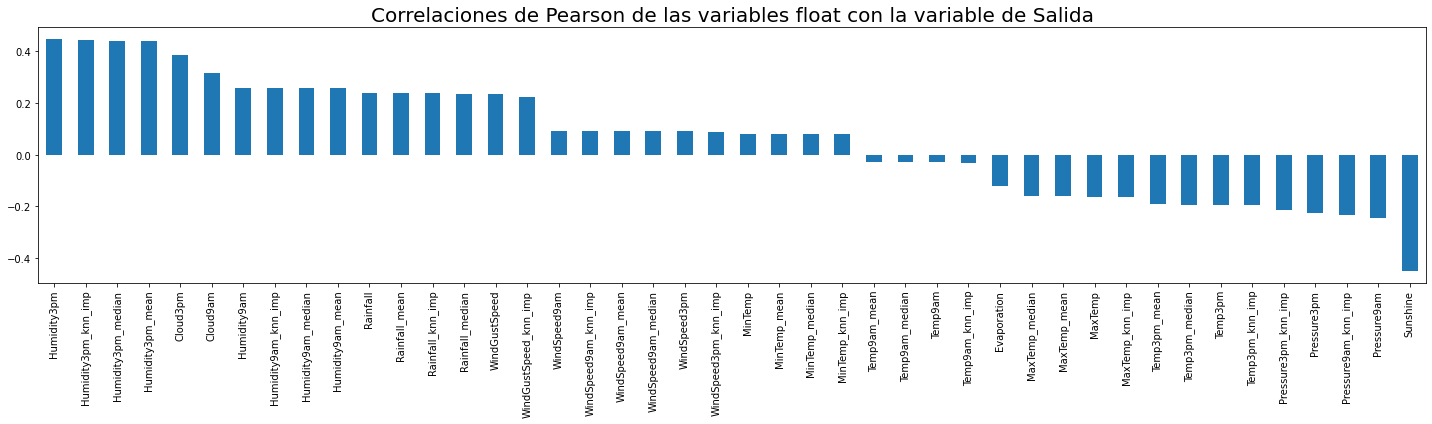

In [14]:
X_train.loc[:,X_train.columns[X_train.dtypes == np.float_]].corrwith(y_train).sort_values(ascending=False).plot(kind='bar', figsize=(20,6))
plt.title('Correlaciones de Pearson de las variables float con la variable de Salida', fontsize=20)
plt.tight_layout()

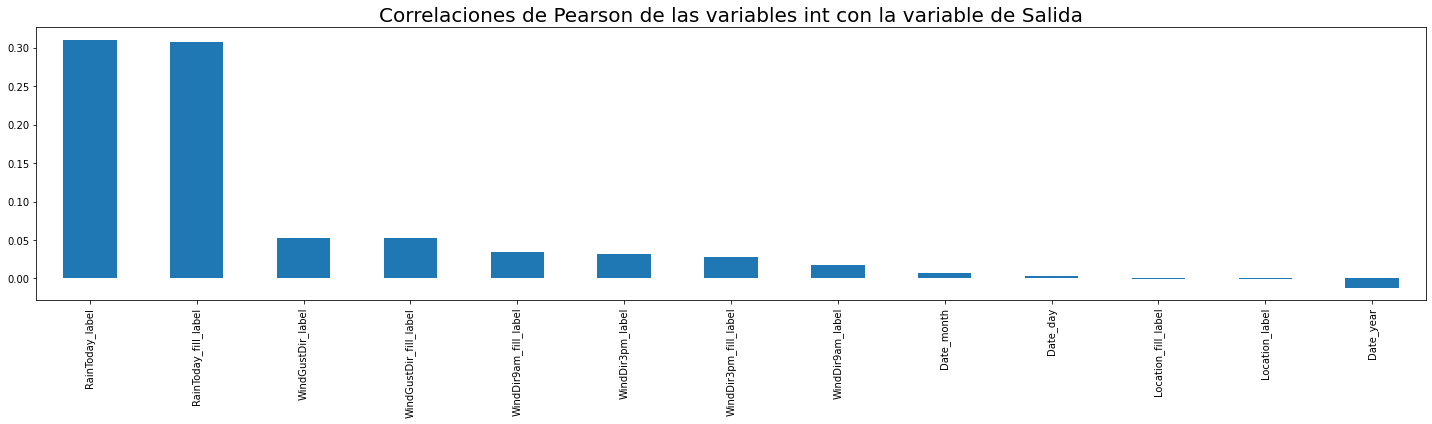

In [15]:
X_train.loc[:,X_train.columns[X_train.dtypes == np.int_]].corrwith(y_train).sort_values(ascending=False).plot(kind='bar', figsize=(20,6))
plt.title('Correlaciones de Pearson de las variables int con la variable de Salida', fontsize=20)
plt.tight_layout()

### Spearman Rank

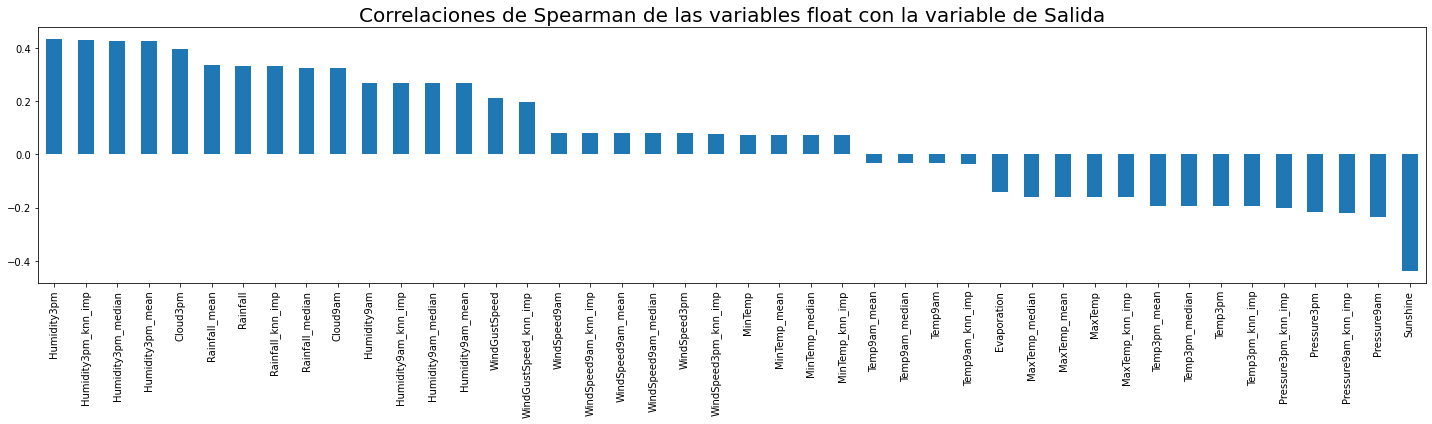

In [16]:
X_train.loc[:,X_train.columns[X_train.dtypes == np.float_]].corrwith(y_train, method='spearman').sort_values(ascending=False).plot(kind='bar', figsize=(20,6))
plt.title('Correlaciones de Spearman de las variables float con la variable de Salida', fontsize=20)
plt.tight_layout()

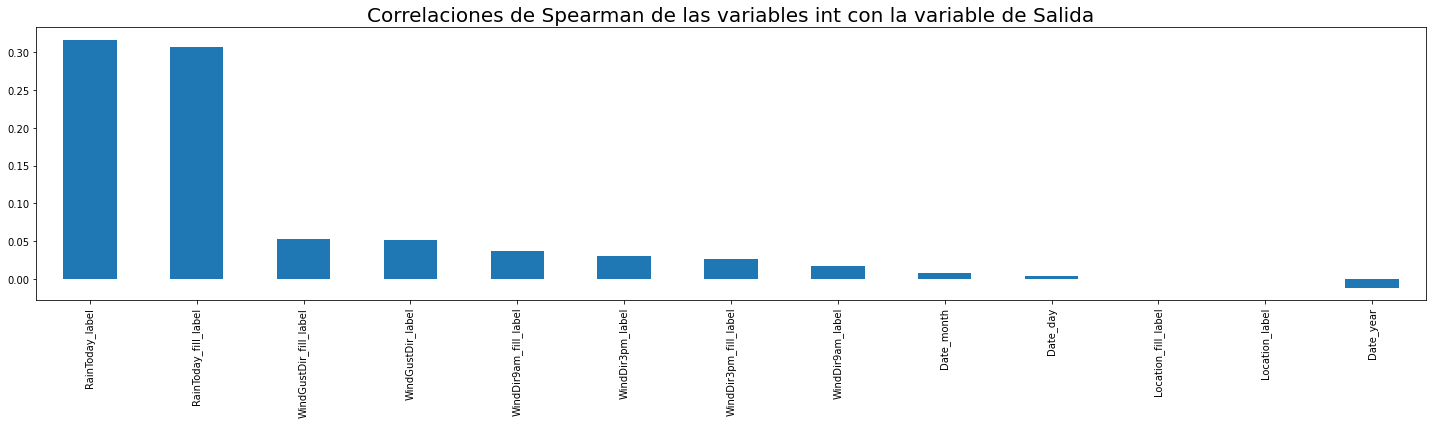

In [17]:
X_train.loc[:,X_train.columns[X_train.dtypes == np.int_]].corrwith(y_train, method='spearman').sort_values(ascending=False).plot(kind='bar', figsize=(20,6))
plt.title('Correlaciones de Spearman de las variables int con la variable de Salida', fontsize=20)
plt.tight_layout()

### Informacion Mutua

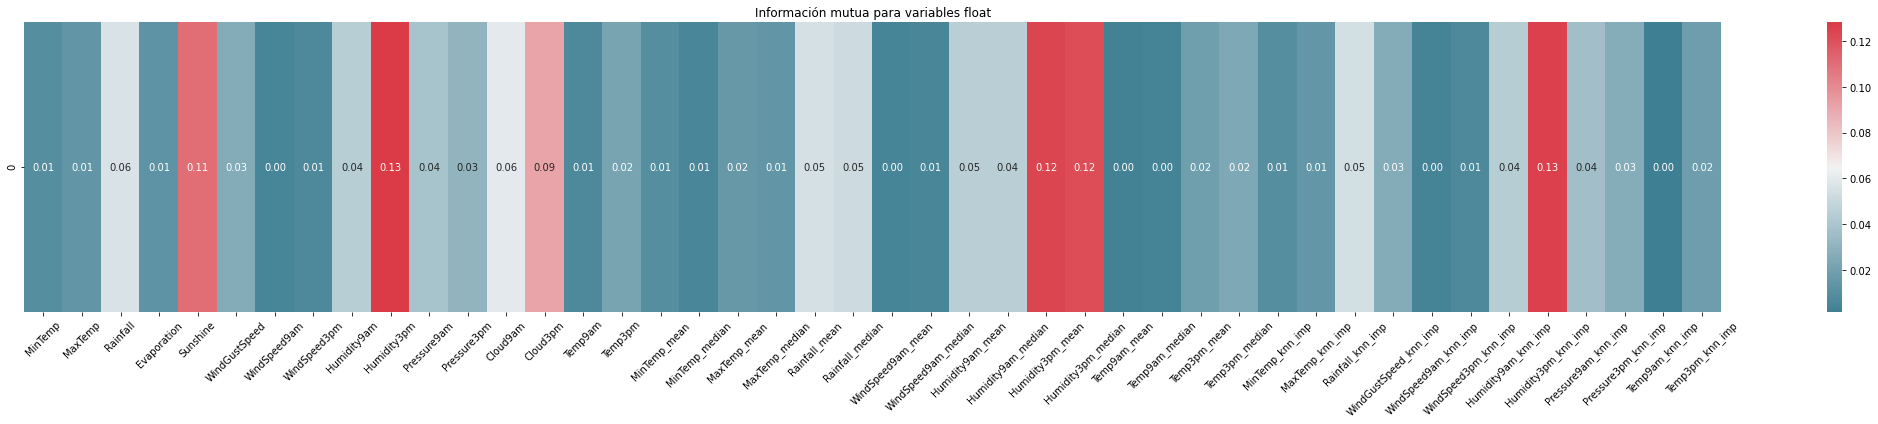

In [18]:
mut_info_float = mutual_info_classif(X_train.loc[X_train.isnull().sum(axis=1)==0, X_train.columns[X_train.dtypes == np.float_]], y_train[X_train.isnull().sum(axis=1)==0])

fig, ax = plt.subplots(1,1, figsize=(30,6))
ax.set_title('Información mutua para variables float')
sns.heatmap([mut_info_float],ax=ax,cmap=sns.diverging_palette(220,10,as_cmap=True), annot=True,fmt=".2f")
ax.set_xticklabels(X_train.loc[X_train.isnull().sum(axis=1)==0, X_train.columns[X_train.dtypes == np.float_]].columns.values)
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()

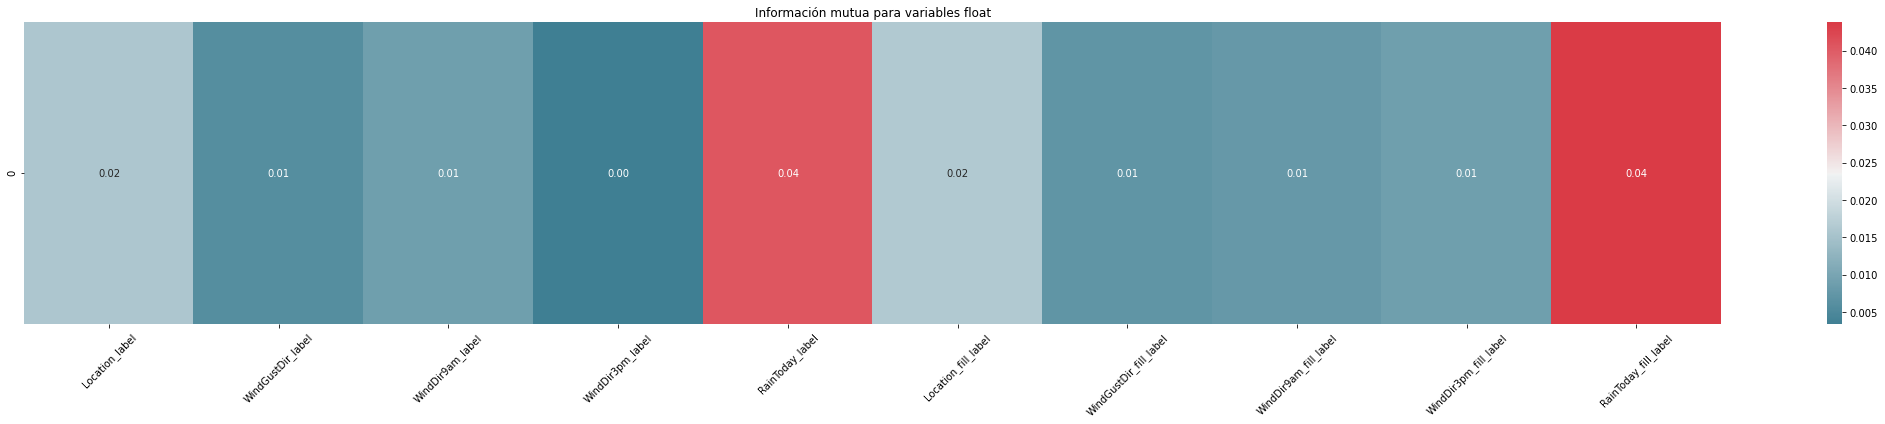

In [ ]:
mut_info_int = mutual_info_classif(X_train.loc[X_train.isnull().sum(axis=1)==0, X_train.columns[X_train.dtypes == np.int_]], y_train[X_train.isnull().sum(axis=1)==0])

fig, ax = plt.subplots(1,1, figsize=(30,6))
ax.set_title('Información mutua para variables float')
sns.heatmap([mut_info_int],ax=ax,cmap=sns.diverging_palette(220,10,as_cmap=True), annot=True,fmt=".2f")
ax.set_xticklabels(X_train.loc[X_train.isnull().sum(axis=1)==0, X_train.columns[X_train.dtypes == np.int_]].columns.values)
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()

## Modelado

Las features fueron seleccionadas por sus resultados en cuanto a informacion mutua y correlaciones. 

> Las features `Sunshine`, `Cloud9am` y `Cloud3pm` no fueron incluidas por su alto contenido de valores nulos e realizar alguna tactica de imputacion seria alterar demasiado su distribucion.

In [20]:
X = X_train[['RainToday_label','Humidity3pm_knn_imp','Humidity9am_knn_imp','Rainfall_mean']]
y = y_train

In [30]:
X_test_knn_imp = imputer.transform(X_test[X_train.columns[[2, 3, 4, 8, 11, 12, 13, 14, 15, 16, 19, 20]]])

In [32]:
X_test_knn_imp

array([[2.19000000e+01, 3.94000000e+01, 1.60000000e+00, ...,
        1.00410000e+03, 2.98000000e+01, 3.54000000e+01],
       [2.05000000e+01, 3.75000000e+01, 0.00000000e+00, ...,
        1.00650000e+03, 2.73000000e+01, 3.57000000e+01],
       [5.10000000e+00, 1.72000000e+01, 2.00000000e-01, ...,
        1.02323333e+03, 1.01000000e+01, 1.61000000e+01],
       ...,
       [7.70000000e+00, 2.11000000e+01, 0.00000000e+00, ...,
        1.01450000e+03, 1.22000000e+01, 1.92000000e+01],
       [4.20000000e+00, 1.94000000e+01, 5.00000000e+00, ...,
        1.01500000e+03, 1.01000000e+01, 1.87000000e+01],
       [9.40000000e+00, 1.71000000e+01, 5.20000000e+00, ...,
        9.94600000e+02, 1.08000000e+01, 1.68000000e+01]])

In [38]:
X_test_ = pd.DataFrame()

X_test_.loc[:,'RainToday_label'] = rain_today_enco.transform(X_test['RainToday'].astype(str))
X_test_.loc[:,'Humidity3pm_knn_imp'] = X_test_knn_imp[:, 7]
X_test_.loc[:,'Humidity9am_knn_imp'] = X_test_knn_imp[:, 6]
X_test_.loc[:,'Rainfall_mean'] = X_test['Rainfall'].fillna(X_train['Rainfall'].mean())


In [37]:
X_test_.head()

,RainToday_label,Humidity3pm_knn_imp,Humidity9am_knn_imp,Rainfall_mean
0,1,26.0,50.0,None
1,0,22.0,47.0,None
2,0,51.0,68.0,None
3,0,79.0,80.0,None
4,0,52.0,88.0,None


In [19]:
def get_mets(x):
    metrics = []
    report = x.split(' ')
    for i in range(len(report)-1):
        if len(report[i]) > 3:
            metrics.append(report[i])
    return metrics

### KNN Classifier

In [21]:
knn_params = {'leaf_size':[1,5,10,15,20,25,30] ,'n_neighbors':[5,6,7,8,9,10,11], 'p':[1,2], 'weights':['uniform','distance']}
knn = KNeighborsClassifier()
grid_knn = GridSearchCV (knn, knn_params, scoring='roc_auc', cv=5)
grid_knn.fit(X,y)

print('La AUC mas alta conseguida es {} con los siguientes parametros {}'.format(grid_knn.best_score_, 
                                                                                 grid_knn.best_params_))

La AUC mas alta conseguida es 0.7742048675949819 con los siguientes parametros {'leaf_size': 10, 'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}


In [35]:
knn_ = KNeighborsClassifier(n_neighbors= 11, leaf_size= 10, p=1, weights='uniform')
knn_.fit(X,y)
knn_y_pred = knn_.predict(X_test_)

class_rep_knn = classification_report(y_test, knn_y_pred)
print(class_rep_knn)

ValueError: ignored

In [ ]:
knn_metrics = get_mets(class_rep_knn)

knn_precision = knn_metrics[8]
knn_recall = knn_metrics[9]
knn_f1 = round(f1_score(testy, knn_y_pred),2)
knn_acc = round(accuracy_score(testy, knn_y_pred),2)

print('La precision del modelo es {}'.format(knn_precision,))
print('El recall del modelo es {}'.format(knn_recall))
print('El F1 score del modelo es {}'.format(knn_f1))
print('El acierto del modelo es {}'.format(knn_acc))

In [ ]:
#Prediccion sin criterio alguno
ns_pred = [0 for _ in range(len(testy))]
fpr_ns, tpr_ns, threshold = roc_curve(testy, ns_pred)
roc_auc_ns = auc(fpr_ns, tpr_ns)

#test data ROC
fpr_ts_knn, tpr_ts_knn, threshold_knn = roc_curve(testy, knn_y_pred)
roc_auc_test_knn = auc(fpr_ts_knn, tpr_ts_knn)

#Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_ns, tpr_ns, 'g', label = 'Sin Criterio AUC = %0.2f' % roc_auc_ns)
plt.plot(fpr_ts, tpr_ts, 'b', label = 'Testing AUC = %0.2f' % roc_auc_test)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### LogisticRegression

In [ ]:
lr = LogisticRegression()
lr_params = {'solver':['lbfgs','newton-cg', 'liblinear', 'sag', 'saga'],'C': [0.01,0.1,1,10,15], 'penalty' : ['l2']}
grid_lr = GridSearchCV(lr, lr_params, cv=5, error_score=0.)
grid_lr.fit(X,y)

print('La AUC mas alta conseguida es {} con los siguientes parametros {}'.format(grid_lr.best_score_, 
                                                                                 grid_lr.best_params_))



In [ ]:
lr_ = LogisticRegression(C= 0.1, penalty='l2', solver='liblinear')
lr_.fit(X,y)
lr_y_pred = lr_.predict(X_test_)

class_rep_lr = classification_report(y_test, lr_y_pred)

In [ ]:
lr_metrics = get_mets(class_rep_lr)

lr_precision = lr_metrics[8]
lr_recall = lr_metrics[9]
lr_f1 = round(f1_score(testy, lr_y_pred),2)
lr_acc = round(accuracy_score(testy, lr_y_pred),2)

#test data ROC
fpr_ts_lr, tpr_ts_lr, threshold_lr = roc_curve(testy, lr_y_pred)
roc_auc_test_lr = auc(fpr_ts_lr, tpr_ts_lr)

### Decision Tree Classifier

In [ ]:
d_tree = DecisionTreeClassifier(splitter='random')
tree_params = {'criterion': ['gini', 'entropy'], 'max_depth':[None,1,3,5,6,7]}
grid_tree = GridSearchCV(d_tree, tree_params, cv=5, error_score=0.)
grid_tree.fit(X,y)

print('La AUC mas alta conseguida es {} con los siguientes parametros {}'.format(grid_tree.best_score_, 
                                                                                 grid_tree.best_params_))

In [ ]:
tree_ = DecisionTreeClassifier(criterion='gini', max_depth=None, splitter='random')
tree_.fit(X,y)
tree_y_pred = tree_.predict(X_test)

class_rep_tree = classification_report(y_test, tree_y_pred)

In [ ]:
tree_metrics = get_mets(class_rep_tree)

tree_precision = tree_metrics[8]
tree_recall = tree_metrics[9]
tree_f1 = round(f1_score(testy, tree_y_pred),2)
tree_acc = round(accuracy_score(testy, tree_y_pred),2)

#test data ROC
fpr_ts_tree, tpr_ts_tree, threshold_tree = roc_curve(testy, tree_y_pred)
roc_auc_test_tree = auc(fpr_ts_tree, tpr_ts_tree)

### Random Forest Classifier

In [ ]:
forest = RandomForestClassifier()
forest_params = {'n_estimators':[100,300, 400, 50], 'max_depth':[None, 10, 9,8], 'max_features':[2,3,'log2',None]}
grid_forest = GridSearchCV(forest, forest_params, cv=5,error_score=0.)
grid_forest.fit(X,y)

print('La AUC mas alta conseguida es {} con los siguientes parametros {}'.format(grid_forest.best_score_, 
                                                                                 grid_forest.best_params_))

In [ ]:
forest_ = RandomForestClassifier(max_depth=9, n_estimators=300, max_features=3, min_samples_split=3, oob_score=True)
forest_.fit(trainX,trainy)
forest_y_pred = forest_.predict(testX)

class_rep_forest = classification_report(testy, forest_y_pred)

In [ ]:
forest_metrics = get_mets(class_rep_forest)

forest_precision = forest_metrics[8]
forest_recall = forest_metrics[9]
forest_f1 = round(f1_score(testy, forest_y_pred),2)
forest_acc = round(accuracy_score(testy, forest_y_pred),2)

#test data ROC
fpr_ts_forest, tpr_ts_forest, threshold_forest = roc_curve(testy, forest_y_pred)
roc_auc_test_forest = auc(fpr_ts_forest, tpr_ts_forest)